In [18]:
import 


import tensorflow as tf  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
# 导入MNIST数据  
from tensorflow.examples.tutorials.mnist import input_data  
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)  
  
learning_rate = 0.01  
training_epochs = 10  
batch_size = 256  
display_step = 1  
examples_to_show = 10  
n_input = 784  
  
# tf Graph input (only pictures)  
X = tf.placeholder("float", [None, n_input])  
  
# 用字典的方式存储各隐藏层的参数  
n_hidden_1 = 256 # 第一编码层神经元个数  
n_hidden_2 = 128 # 第二编码层神经元个数  
# 权重和偏置的变化在编码层和解码层顺序是相逆的  
# 权重参数矩阵维度是每层的 输入*输出，偏置参数维度取决于输出层的单元数  
weights = {  
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),  
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),  
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),  
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),  
}  
biases = {  
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),  
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),  
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),  
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),  
}  
  
# 每一层结构都是 xW + b  
# 构建编码器  
def encoder(x):  
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),  
                                   biases['encoder_b1']))  
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),  
                                   biases['encoder_b2']))  
    return layer_2  
  
  
# 构建解码器  
def decoder(x):  
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),  
                                   biases['decoder_b1']))  
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),  
                                   biases['decoder_b2']))  
    return layer_2  
  
# 构建模型  
encoder_op = encoder(X)  
decoder_op = decoder(encoder_op)  
  
# 预测  
y_pred = decoder_op  
y_true = X  
  
# 定义代价函数和优化器  
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) #最小二乘法  
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)  
  
sess = tf.Session()
# tf.initialize_all_variables() no long valid from  
# 2017-03-02 if using tensorflow >= 0.12  
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:  
    init = tf.initialize_all_variables()  
else:  
    init = tf.global_variables_initializer()  
sess.run(init)  

SyntaxError: invalid syntax (<ipython-input-18-14a0e852d288>, line 1)

('Epoch:', '0001', 'cost=', '0.060754031')
('Epoch:', '0002', 'cost=', '0.060487874')
('Epoch:', '0003', 'cost=', '0.061819520')
('Epoch:', '0004', 'cost=', '0.058976680')
('Epoch:', '0005', 'cost=', '0.060376581')
('Epoch:', '0006', 'cost=', '0.059655152')
('Epoch:', '0007', 'cost=', '0.058414623')
('Epoch:', '0008', 'cost=', '0.057220981')
('Epoch:', '0009', 'cost=', '0.059290040')
('Epoch:', '0010', 'cost=', '0.058355708')
('Epoch:', '0011', 'cost=', '0.057791647')
('Epoch:', '0012', 'cost=', '0.059518896')
('Epoch:', '0013', 'cost=', '0.057219192')
('Epoch:', '0014', 'cost=', '0.057383072')
('Epoch:', '0015', 'cost=', '0.058700684')
('Epoch:', '0016', 'cost=', '0.056816377')
('Epoch:', '0017', 'cost=', '0.059211034')
('Epoch:', '0018', 'cost=', '0.058802530')
('Epoch:', '0019', 'cost=', '0.059473068')
('Epoch:', '0020', 'cost=', '0.058451992')
('Epoch:', '0021', 'cost=', '0.056936994')
('Epoch:', '0022', 'cost=', '0.057445992')
('Epoch:', '0023', 'cost=', '0.055954468')
('Epoch:', 

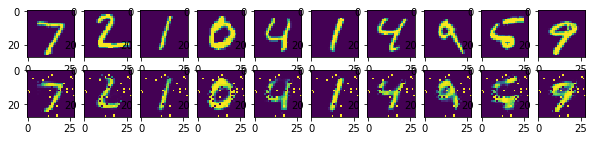

In [15]:
training_epochs = 100 
# 首先计算总批数，保证每次循环训练集中的每个样本都参与训练，不同于批量训练  
total_batch = int(mnist.train.num_examples/batch_size) #总批数  
for epoch in range(training_epochs):  
    for i in range(total_batch):  
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)  # max(x) = 1, min(x) = 0  
        # Run optimization op (backprop) and cost op (to get loss value)  
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})  
    if epoch % display_step == 0:  
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))  
print("Optimization Finished!")  

encode_decode = sess.run(  
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})  
f, a = plt.subplots(2, 10, figsize=(10, 2))  
for i in range(examples_to_show):  
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))  
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))  
plt.show()  

In [27]:
 mnist.train.next_batch(batch_size)[0].shape
    

(256, 784)

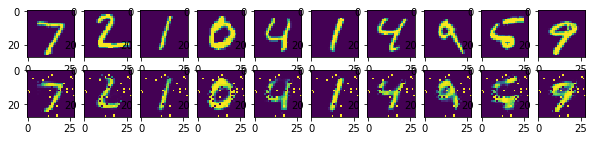

In [16]:
# tf.initialize_all_variables() no long valid from  
# 2017-03-02 if using tensorflow >= 0.12  
# if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:  
#     init = tf.initialize_all_variables()  
# else:  
#     init = tf.global_variables_initializer()  
# sess.run(init)  
# 首先计算总批数，保证每次循环训练集中的每个样本都参与训练，不同于批量训练  
#     total_batch = int(mnist.train.num_examples/batch_size) #总批数  
#     for epoch in range(training_epochs):  
#         for i in range(total_batch):  
#             batch_xs, batch_ys = mnist.train.next_batch(batch_size)  # max(x) = 1, min(x) = 0  
#             # Run optimization op (backprop) and cost op (to get loss value)  
#             _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})  
#         if epoch % display_step == 0:  
#             print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))  
#     print("Optimization Finished!")  

encode_decode = sess.run(  
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})  
f, a = plt.subplots(2, 10, figsize=(10, 2))  
for i in range(examples_to_show):  
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))  
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))  
plt.show()  

In [17]:
mnist.train